In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('seaborn-v0_8-paper')

# **1.Uniform disribution Generator**

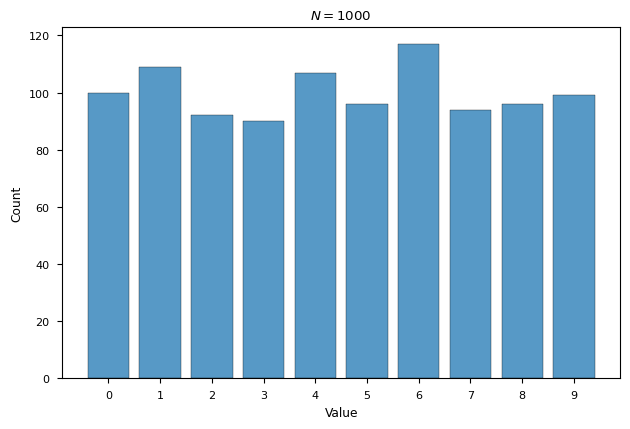

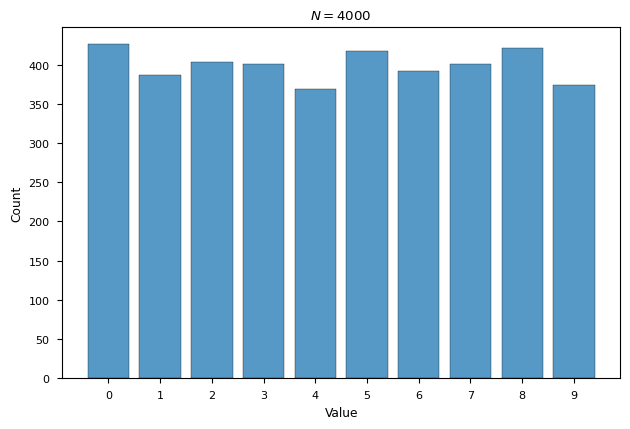

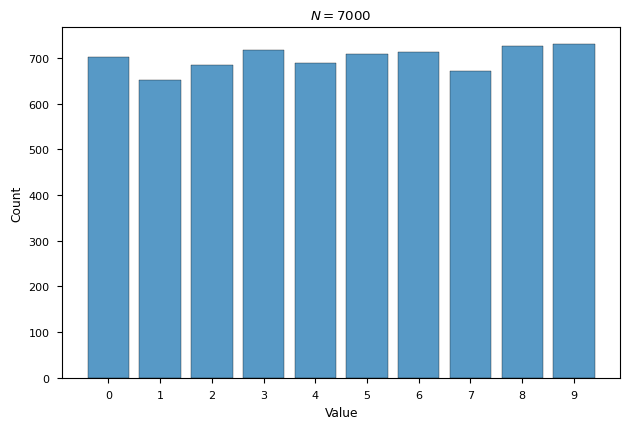

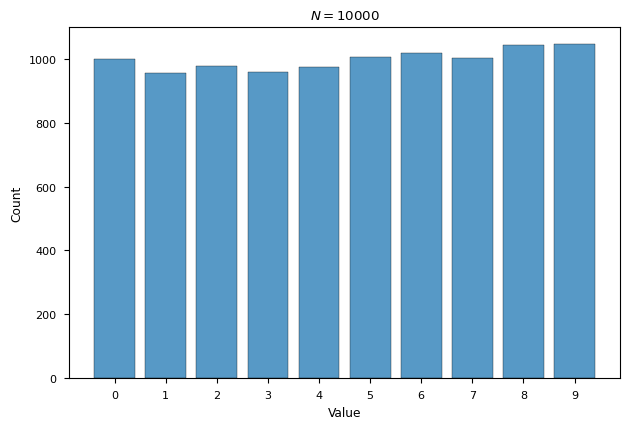

In [ ]:
N = 10000

for i in range(1000, N+1, 3000):
  numbers = np.random.randint(0, 10, size = i)
  sns.histplot(numbers, discrete=True, shrink=0.8)
  plt.title(f'$N = {i}$')
  plt.xticks(np.arange(10))
  plt.xlabel('Value')
  plt.tight_layout()
  plt.show()



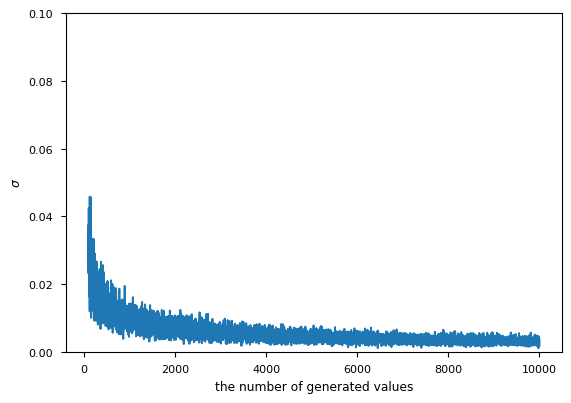

In [ ]:
_ , counts = np.unique(numbers, return_counts = True)
variance = np.sum((counts - N / 10)**2) / (len(counts) - 1)
vars = []
N = 10000

for i in range(100, N):
  numbers = np.random.randint(0, 10, size = i)
  _ , counts = np.unique(numbers, return_counts = True)
  vars.append( np.sqrt(np.sum((counts - i / 10)**2) / (len(counts) - 1))/i)

n = np.arange(100, N)
sns.lineplot(x=n, y=vars)
plt.ylabel(ylabel = '$\sigma$')
plt.xlabel(xlabel = 'the number of generated values')
plt.ylim(0, 0.1)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
feature = n**(-1/2)
model = LinearRegression().fit(feature.reshape(-1, 1), vars)
p = model.predict(feature.reshape(-1, 1))
mse = mean_squared_error(vars, p)
mse#mse is very low so its agree with the statement in the question that \sigma / N ~ 1/(N)^0.5

2.570379951973214e-06

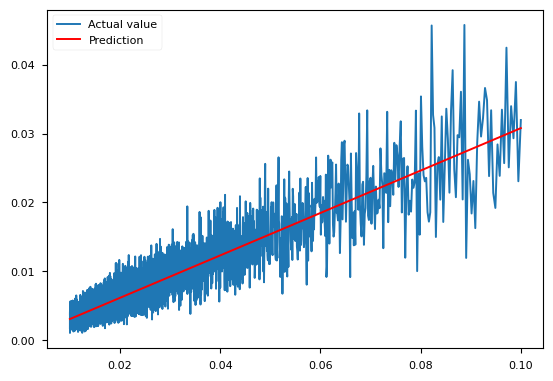

In [ ]:
plt.plot(feature, vars, label = 'Actual value')
plt.plot(feature, p, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

In [ ]:
#now i will use 'chisquare' statistical test for checking whether data follows normal distribution or not
from scipy.stats import chisquare
numbers = np.random.randint(0, 10, size = N)
expected_counts = np.full(10, len(numbers)/10)
_, counts = np.unique(numbers, return_counts = True)

chi2_stat, p_value = chisquare(counts, expected_counts)
p_value#if it is higher than 0.05 then data follows uniform distribution,which here is the case

np.float64(0.956728686545932)

# **2.checking correlation**

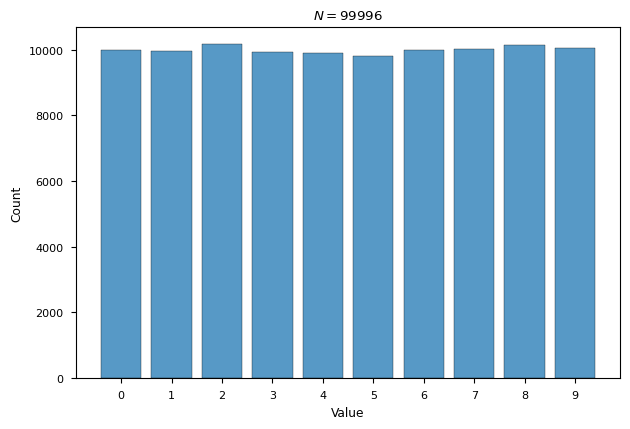

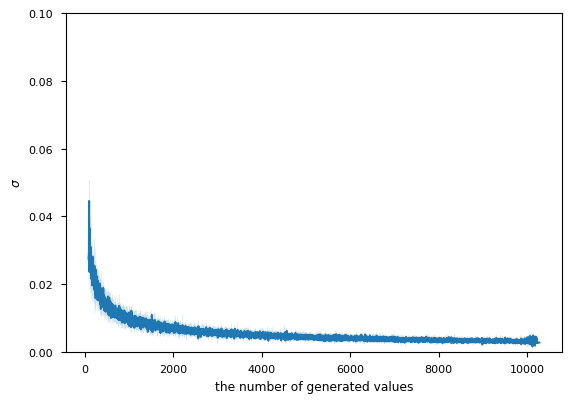

In [ ]:
arr = np.random.randint(0,10,10*N)
mask = np.roll((arr == 4), -1)
mask[-1] = False#we shouldnt pick the last number, cuz there is no number ahead of it
arr = arr[mask]#now the process is as before

sns.histplot(arr, discrete=True, shrink=0.8)
plt.title(f'$N = {len(arr)}$')
plt.xticks(np.arange(10))
plt.xlabel('Value')
plt.tight_layout()
plt.show()



vars = []
n = []
N = 100000

for i in range(1000, N):
  arr = np.random.randint(0, 10, size = i)
  mask = np.roll((arr == 4), -1)
  arr = arr[mask]
  _ , counts = np.unique(arr, return_counts = True)
  vars.append( np.sqrt(np.sum((counts - len(arr) / 10)**2) / (len(counts) - 1))/len(arr))
  n.append(len(arr))

sns.lineplot(x=n, y=vars)
plt.ylabel(ylabel = '$\sigma$')
plt.xlabel(xlabel = 'the number of generated values')
plt.ylim(0, 0.1)
plt.show()

In [ ]:
n = np.array(n)
vars = np.array(vars)
feature = n**(-1/2)
model = LinearRegression().fit(feature.reshape(-1, 1), vars)
p = model.predict(feature.reshape(-1, 1))
mse = mean_squared_error(vars, p)
mse

2.4838139210296388e-06

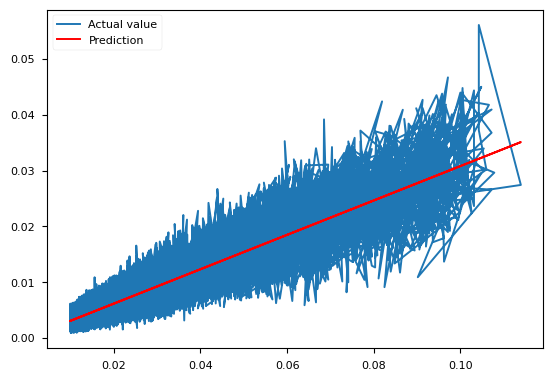

In [ ]:
plt.plot(feature, vars, label = 'Actual value')
plt.plot(feature, p, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

#3.Linear Congruential Generator

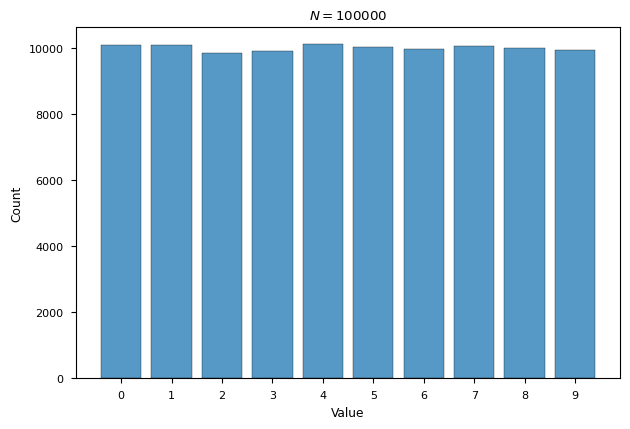

In [ ]:
def LGC(seed = 42, c = 1013904223, a = 1664525, m = 2**31,size = 1):
  arr = np.zeros(size)
  arr[0] = seed
  for i in range(1, size):
    arr[i] = ((a * arr[i-1] + c) % m)
  return arr

arr = LGC(size = 100000) % 10
sns.histplot(arr, discrete=True, shrink=0.8)
plt.title(f'$N = {len(arr)}$')
plt.xticks(np.arange(10))
plt.xlabel('Value')
plt.tight_layout()
plt.show()



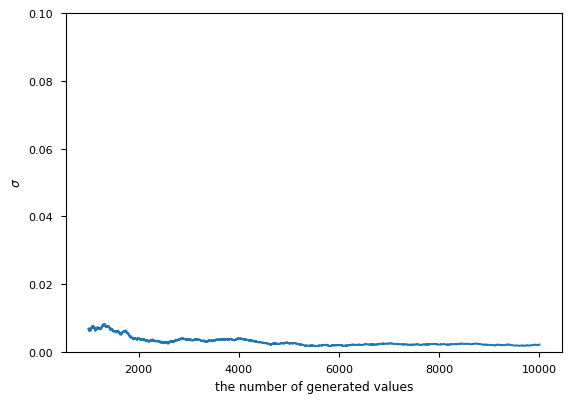

3.033639804474677e-07


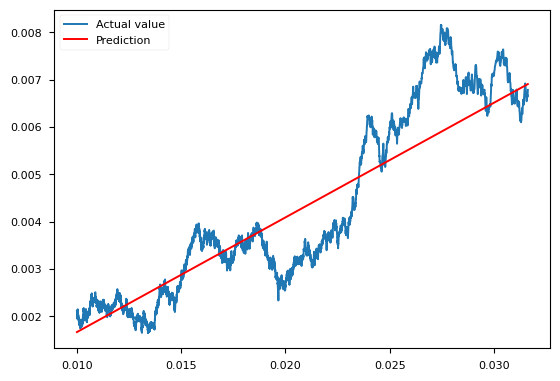

In [ ]:
vars = []
n = []
N = 10000

for i in range(1000, N):
  arr = LGC(size = i) % 10
  _ , counts = np.unique(arr, return_counts = True)
  vars.append( np.sqrt(np.sum((counts - len(arr) / 10)**2) / (len(counts) - 1))/len(arr))
  n.append(len(arr))

sns.lineplot(x=n, y=vars)
plt.ylabel(ylabel = '$\sigma$')
plt.xlabel(xlabel = 'the number of generated values')
plt.ylim(0, 0.1)
plt.show()


n = np.array(n)
vars = np.array(vars)
feature = n**(-1/2)
model = LinearRegression().fit(feature.reshape(-1, 1), vars)
p = model.predict(feature.reshape(-1, 1))
mse = mean_squared_error(vars, p)
print(mse)

plt.plot(feature, vars, label = 'Actual value')
plt.plot(feature, p, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

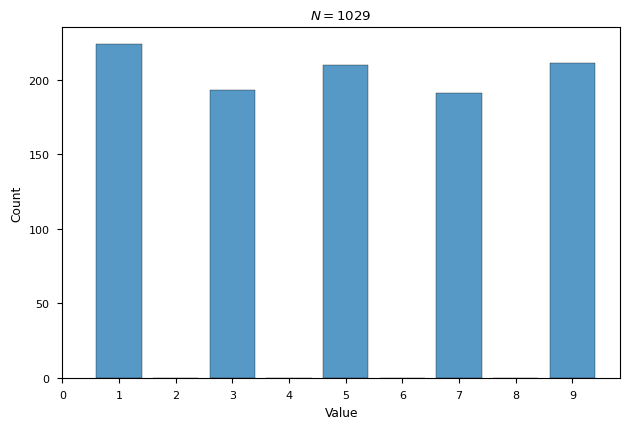

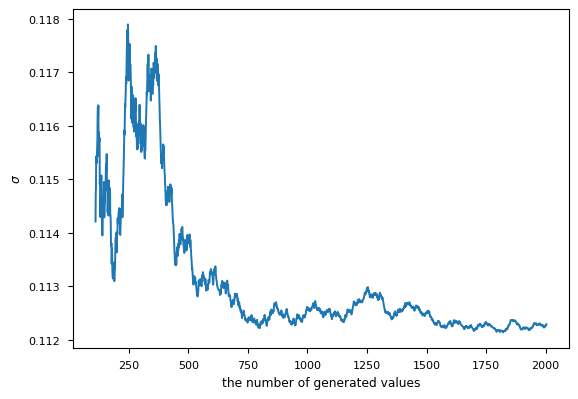

6.002028758644617e-07


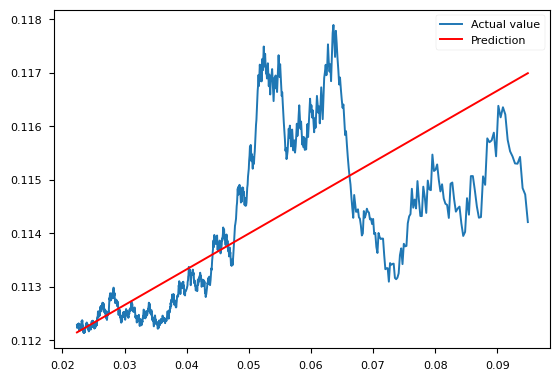

In [ ]:
#proccess is the same as before
arr = LGC(size = 10000) % 10
mask = np.roll((arr == 4), -1)
mask[-1] = False#we shouldnt pick the last number, cuz there is no number ahead of it
arr = arr[mask]#now the process is as before

sns.histplot(arr, discrete=True, shrink=0.8)
plt.title(f'$N = {len(arr)}$')
plt.xticks(np.arange(10))
plt.xlabel('Value')
plt.tight_layout()
plt.show()


vars = []
n = []
N = 20000

for i in range(1000, N):
  arr = LGC(size = i) % 10
  mask = np.roll((arr == 4), -1)
  arr = arr[mask]
  _ , counts = np.unique(arr, return_counts = True)
  vars.append( np.sqrt(np.sum((counts - len(arr) / 10)**2) / (len(counts) - 1))/len(arr))
  n.append(len(arr))

sns.lineplot(x=n, y=vars)
plt.ylabel(ylabel = '$\sigma$')
plt.xlabel(xlabel = 'the number of generated values')
plt.show()

n = np.array(n)
vars = np.array(vars)
feature = n**(-1/2)
model = LinearRegression().fit(feature.reshape(-1, 1), vars)
p = model.predict(feature.reshape(-1, 1))
mse = mean_squared_error(vars, p)
print(mse)

plt.plot(feature, vars, label = 'Actual value')
plt.plot(feature, p, color = 'red', label = 'Prediction')
plt.legend()
plt.show()

# **4.Centeral Limit theorem**

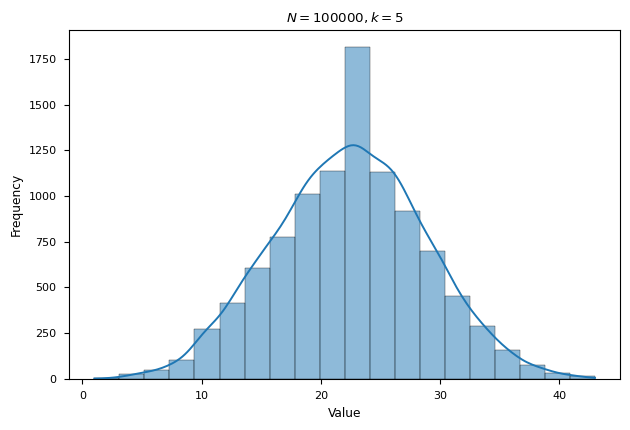

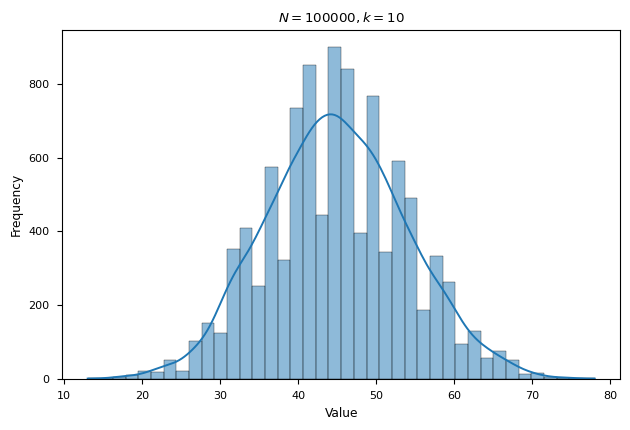

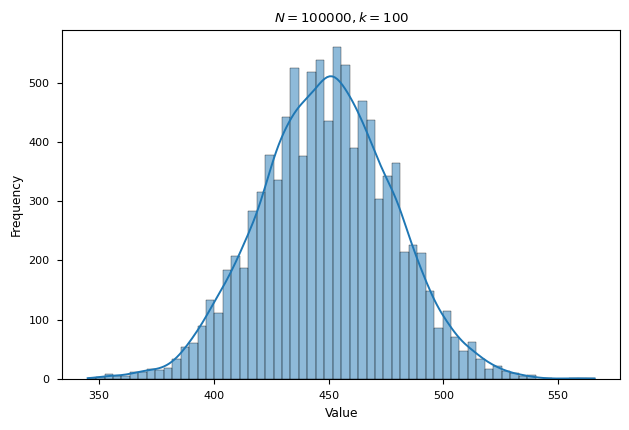

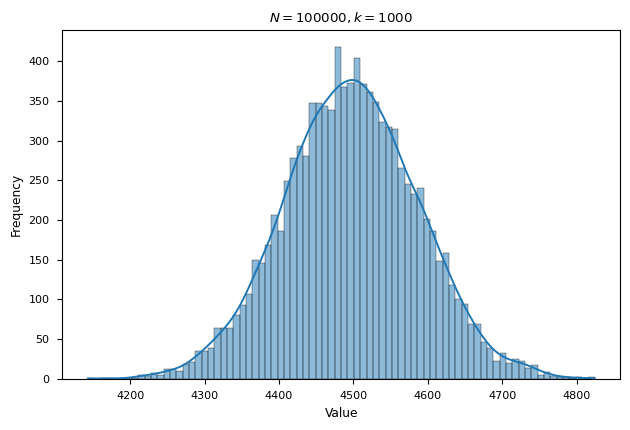

In [7]:
#first i will create N=100,000 random numbers between 0 and 9, then calculate sum of the k random number chosen from this 100,000 numbers
N = 100000
k = [5, 10 ,100, 1000]
numbers = np.random.randint(0, 10, N)
for i, k in enumerate(k):
  sum = []

  for j in range(10000):
    idx = np.random.choice(N, size=k, replace=False)
    sum.append(np.sum(numbers[idx]))

  sns.histplot(sum, bins=(i+1)*20,kde=True)
  plt.title(f'$N = {N}, k = {k}$')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()


#as you can see from this figures the distributions are normal as CLT predicted.

# **5.Generating a Gaussian distribution from a Normal distribution**

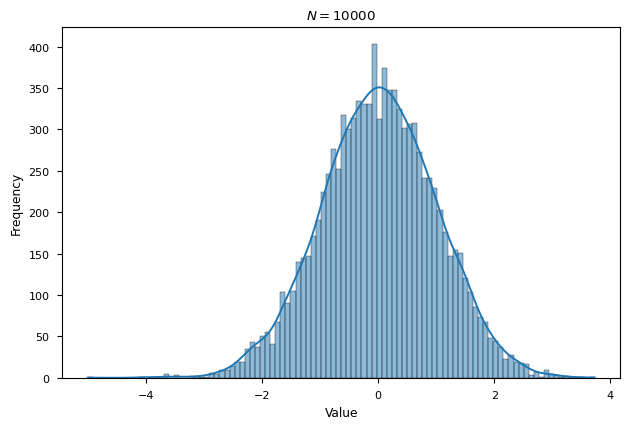

In [10]:
k = 10000#crearing samples with 10000 numbers
sigma = 1#for simplicity
X=[]
Y=[]
for i in range(k):
  x = np.random.rand()
  y = np.random.rand()
  r =np.sqrt(-2*sigma**2*np.log(x))
  theta = 2*np.pi*y
  X.append(r*np.cos(theta))
  Y.append(r*np.sin(theta))

sns.histplot(X, bins=100,kde=True)
plt.title(f'$N = {k}$')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



In [18]:
#lets fit a Gaussian model to this Data to confirm it is guassian
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=1, random_state=0).fit(np.array(X).reshape(-1, 1))
avg = model.means_[0][0]
std = np.sqrt(model.covariances_[0][0])
print(avg, std)
#which as expected is normal distribution with sigma = 1 .

0.01709621989113887 [0.99048159]
